<a href="https://colab.research.google.com/github/Christoforos00/NLP_project/blob/main/nlp_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_json('/content/drive/My Drive/News_Category_Dataset_v2.json', lines=True)

In [ ]:
df

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df = df[:100000]

df['text'] = df['headline'] + " " + df['short_description']
texts = df['text'].tolist() 
labels = df['category'].tolist()

In [ ]:
del df

In [ ]:

nltk.download('wordnet')
import re
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()
text_edited = []

for text in texts: 

    # Remove all the special characters
    text = re.sub('\W', ' ', str(text))
    
    # Remove \n
    text = re.sub('\s+[\\n\\r]+', '', text)
   
    # Remove all single characters
    text = re.sub('\s+[a-zA-Z]\s+', ' ', text)

    # Substitute multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)

    # Convert to lowercase
    text = text.lower()

    # Split the documents based on whitespace 
    text = text.split()

    # Lemmatization
    text = [stemmer.lemmatize(word) for word in text]

    # Reconstruct the document by joining the words on each whitespace
    text = ' '.join(text)

    text_edited.append(text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(text_edited, labels, test_size=0.2, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Exclude stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Vectorize the text
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),  # Use unigram & bi-gram tf*idf features
    max_features = 5000,  # Keep top 5000 features 
    sublinear_tf=True,  # Replace tf with 1 + log(tf)
    stop_words=stopwords.words('english'))  # Remove stopwords

# Fit Vectorizer on train data
# Transform on all data
X_train = vectorizer.fit_transform(X_train) 
X_test = vectorizer.transform(X_test)

print(vectorizer.get_feature_names())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['000', '000 people', '10', '10 000', '10 best', '10 thing', '10 way', '10 year', '100', '100 000', '100 percent', '11', '11 year', '12', '12 year', '13', '14', '15', '15 year', '150', '16', '16 year', '17', '17 year', '18', '18 year', '19', '20', '20 year', '200', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '21', '21st', '21st century', '22', '23', '24', '24 wall', '25', '25 year', '26', '27', '28', '29', '30', '30 year', '300', '31', '32', '33', '35', '36', '38', '40', '40 year', '400', '43', '45', '48', '4th', '50', '50 year', '500', '60', '65', '70', '75', '80', '90', '99', 'aaron', 'abandoned', 'abc', 'ability', 'able', 'abortion', 'abroad', 'absolutely', 'abuse', 'academic', 'academy', 'accept', 'acceptance', 'accepted', 'accepting', 'access', 'accessory', 'accident', 'accidentally', 'accomplish', 'according', 'accordin

In [ ]:
del text_edited
del labels


y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Reduce dimensionality using svd 5000 --> 500
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=500, random_state=4321)
X_train = svd.fit_transform(X_train)
X_test = svd.transform(X_test)

In [ ]:
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.25, random_state=101)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay


In [ ]:
print("Results of the majority classifier")

baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train, y_train)

print("Classification report on the training data:")
predictions_train = baseline.predict(X_train)
print(classification_report(y_train, predictions_train))

print("Classification report on the development data:")
predictions_dev = baseline.predict(X_dev)
print(classification_report(y_dev, predictions_dev))

print("Classification report on the test data:")
predictions_test = baseline.predict(X_test)
print(classification_report(y_test, predictions_test))



Results of the majority classifier
Classification report on the training data:


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

          ARTS       0.00      0.00      0.00       431
ARTS & CULTURE       0.00      0.00      0.00       400
  BLACK VOICES       0.00      0.00      0.00      1339
      BUSINESS       0.00      0.00      0.00      1731
       COLLEGE       0.00      0.00      0.00       351
        COMEDY       0.00      0.00      0.00      1462
         CRIME       0.00      0.00      0.00      1024
CULTURE & ARTS       0.00      0.00      0.00       296
       DIVORCE       0.00      0.00      0.00      1038
     EDUCATION       0.00      0.00      0.00       308
 ENTERTAINMENT       0.00      0.00      0.00      4797
   ENVIRONMENT       0.00      0.00      0.00       380
         FIFTY       0.00      0.00      0.00       430
  FOOD & DRINK       0.00      0.00      0.00      1895
     GOOD NEWS       0.00      0.00      0.00       398
         GREEN       0.00      0.00      0.00       817
HEALTHY LIVING       0.00      0.00      0.00  

In [ ]:
for c in [0.1,0.5,1,5,10,20]:
    
    logReg = LogisticRegression(solver="liblinear", C = c)
    logReg.fit(X_train, y_train)

    
    predictions_dev = logReg.predict(X_dev)

    print("Dev data accuracy for C =",c) 
    print(accuracy_score(y_dev, predictions_dev))

    print("Dev f1 for C =",c) 
    print(f1_score(y_dev, predictions_dev))

In [ ]:
learning_curve_steps = np.arange(len(X_train)/10,len(X_train)+1,len(X_train)/10).astype(int)
training_f1_scores = []
development_f1_scores = []

for index in learning_curve_steps:
    print(index)
    logReg = LogisticRegression(solver="liblinear", C = 10)
    logReg.fit(X_train[0:index], y_train[0:index])

    predictions_train = logReg.predict(X_train[0:index]) 
    predictions_dev = logReg.predict(X_dev)

    training_f1_scores.append( f1_score(y_train[0:index], predictions_train, average='macro')     )
    development_f1_scores.append(  f1_score(y_dev, predictions_dev, average='macro')   )

6000
12000
18000
24000
30000
36000
42000
48000
54000
60000


In [ ]:
print("Results of logistic regression with C =",10)

logReg = LogisticRegression(solver="liblinear", C = 10)
logReg.fit(X_train, y_train)

print("Classification report on the training data:")
predictions_train = logReg.predict(X_train)
print(classification_report(y_train, predictions_train))

print("Classification report on the development data:")
predictions_dev = logReg.predict(X_dev)
print(classification_report(y_dev, predictions_dev))

print("Classification report on the test data:")
predictions_test = logReg.predict(X_test)
print(classification_report(y_test, predictions_test))


Results of logistic regression with C = 10
Classification report on the training data:
                precision    recall  f1-score   support

          ARTS       0.45      0.16      0.24       431
ARTS & CULTURE       0.47      0.15      0.22       400
  BLACK VOICES       0.52      0.28      0.36      1339
      BUSINESS       0.47      0.42      0.44      1731
       COLLEGE       0.53      0.38      0.44       351
        COMEDY       0.54      0.31      0.40      1462
         CRIME       0.55      0.53      0.54      1024
CULTURE & ARTS       0.68      0.22      0.34       296
       DIVORCE       0.79      0.66      0.72      1038
     EDUCATION       0.49      0.30      0.37       308
 ENTERTAINMENT       0.46      0.70      0.55      4797
   ENVIRONMENT       0.71      0.19      0.30       380
         FIFTY       0.45      0.07      0.12       430
  FOOD & DRINK       0.59      0.70      0.64      1895
     GOOD NEWS       0.47      0.14      0.21       398
         GREEN  

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(learning_curve_steps, training_f1_scores, label = "training f1 score")
plt.plot(learning_curve_steps, development_f1_scores, label = "development f1 score")
plt.title("Learning curves")
plt.legend()

NameError: ignored

In [ ]:
#macro average precision/rec, roc , auc

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
pred_test_bin = lb.fit_transform(predictions_test)
y_test_bin = lb.transform(y_test)

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

fpr["macro"], tpr["macro"], _ = roc_curve(y_test_bin.ravel(), pred_test_bin.ravel())
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


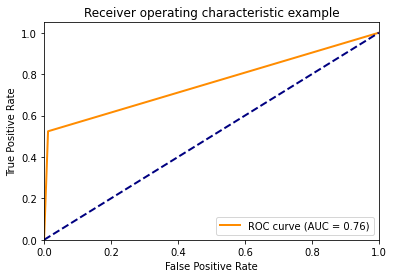

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr["macro"], tpr["macro"], color='darkorange',
         lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc["macro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()